# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import CloudSEN12Dataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 42675


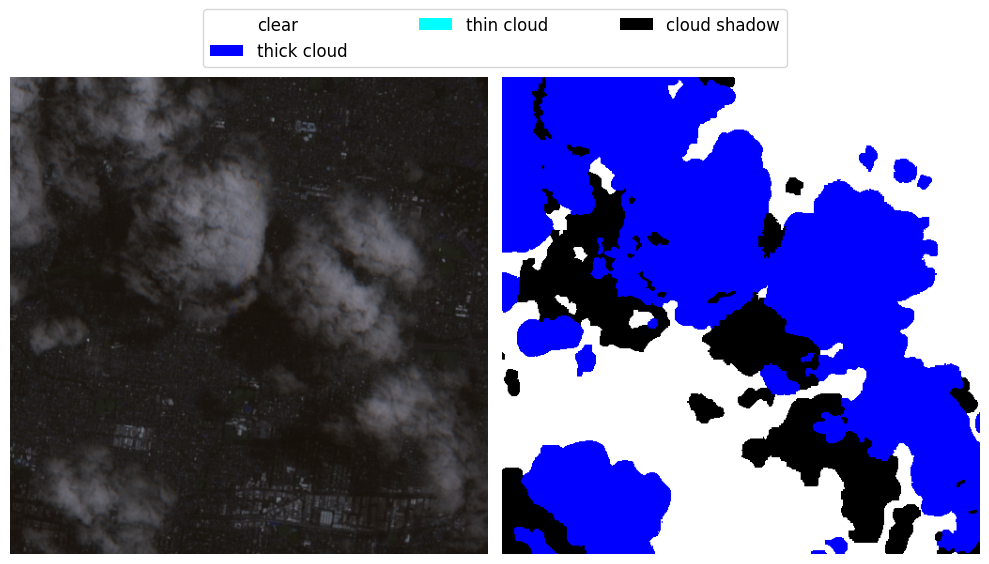

2024-06-25 18:41:05,994 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


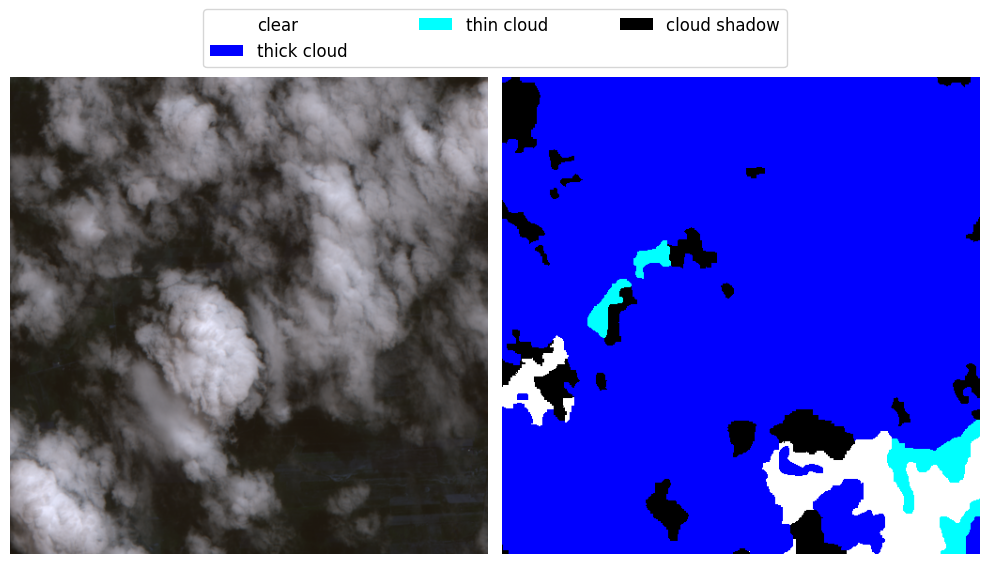

In [8]:
dataset_config = {
    "data_dir": "/home/dragik/data/CloudSEN12/training",
    "selection": "rgb"
}
dataset = CloudSEN12Dataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(20);

In [9]:
dataset.data_distribution_table()

,Number of pixels
clear,2.435084e+09
thick cloud,5.922057e+08
thin cloud,2.123958e+08
cloud shadow,1.954704e+08


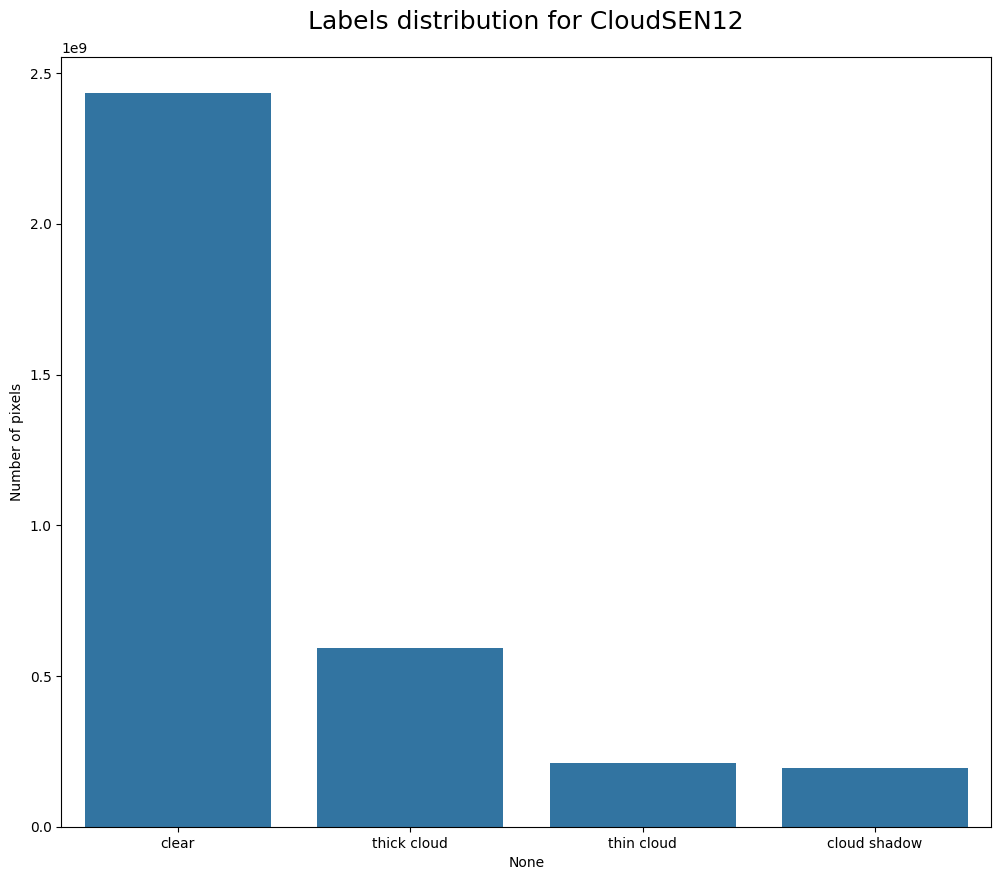

In [9]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [8]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/CloudSEN12/training",
    "selection": "rgb",
    "transforms": ["aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"], 
    
}
train_dataset = CloudSEN12Dataset(train_dataset_config)
len(train_dataset)

42675

## Create the model

In [9]:
epochs = 5
model_directory = "/home/dragik/data/CloudSEN12/experiments_rgb"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [10]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|██▋                                                                    | 99/2668 [00:17<06:40,  6.41it/s]

[1, 100], loss:  0.78024


training:   7%|█████▏                                                                | 199/2668 [00:33<06:27,  6.37it/s]

[1, 200], loss:  0.70448


training:  11%|███████▊                                                              | 299/2668 [00:49<06:19,  6.24it/s]

[1, 300], loss:  0.66018


training:  15%|██████████▍                                                           | 399/2668 [01:05<05:59,  6.31it/s]

[1, 400], loss:  0.63775


training:  19%|█████████████                                                         | 499/2668 [01:21<05:44,  6.30it/s]

[1, 500], loss:  0.57446


training:  22%|███████████████▋                                                      | 599/2668 [01:37<05:35,  6.17it/s]

[1, 600], loss:  0.56663


training:  26%|██████████████████▎                                                   | 699/2668 [01:53<05:16,  6.23it/s]

[1, 700], loss:  0.55149


training:  30%|████████████████████▉                                                 | 799/2668 [02:09<05:02,  6.17it/s]

[1, 800], loss:  0.56934


training:  34%|███████████████████████▌                                              | 899/2668 [02:25<04:46,  6.17it/s]

[1, 900], loss:  0.50305


training:  37%|██████████████████████████▏                                           | 999/2668 [02:41<04:28,  6.22it/s]

[1, 1000], loss:  0.52843


training:  41%|████████████████████████████▍                                        | 1099/2668 [02:57<04:14,  6.17it/s]

[1, 1100], loss:  0.53497


training:  45%|███████████████████████████████                                      | 1199/2668 [03:14<03:53,  6.29it/s]

[1, 1200], loss:  0.58612


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [03:30<03:38,  6.27it/s]

[1, 1300], loss:  0.48264


training:  52%|████████████████████████████████████▏                                | 1399/2668 [03:46<03:22,  6.28it/s]

[1, 1400], loss:  0.49391


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [04:02<03:07,  6.25it/s]

[1, 1500], loss:  0.52924


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [04:18<02:51,  6.25it/s]

[1, 1600], loss:  0.49009


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [04:34<02:35,  6.23it/s]

[1, 1700], loss:  0.51509


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [04:50<02:19,  6.24it/s]

[1, 1800], loss:  0.55715


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [05:06<02:03,  6.23it/s]

[1, 1900], loss:  0.47922


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [05:22<01:47,  6.23it/s]

[1, 2000], loss:  0.45693


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [05:38<01:31,  6.21it/s]

[1, 2100], loss:  0.49964


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [05:54<01:15,  6.18it/s]

[1, 2200], loss:  0.50489


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [06:10<00:59,  6.23it/s]

[1, 2300], loss:  0.53228


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [06:26<00:42,  6.26it/s]

[1, 2400], loss:  0.52378


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [06:42<00:27,  6.24it/s]

[1, 2500], loss:  0.54599


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [06:58<00:11,  6.23it/s]

[1, 2600], loss:  0.55861


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [07:10<00:00,  6.20it/s]

epoch: 1, time: 430, loss:  0.55117



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [06:21<00:00,  7.00it/s]

IOU:0.34033586981179853, IOU mean:0.10740546410548567, IOU per Class:[0.42962186 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [00:16<06:49,  6.27it/s]

[2, 100], loss:  0.50464


training:   7%|█████▏                                                                | 199/2668 [00:32<06:32,  6.28it/s]

[2, 200], loss:  0.51460


training:  11%|███████▊                                                              | 299/2668 [00:48<06:19,  6.24it/s]

[2, 300], loss:  0.50766


training:  15%|██████████▍                                                           | 399/2668 [01:04<05:58,  6.32it/s]

[2, 400], loss:  0.46577


training:  19%|█████████████                                                         | 499/2668 [01:20<05:43,  6.32it/s]

[2, 500], loss:  0.46484


training:  22%|███████████████▋                                                      | 599/2668 [01:36<05:30,  6.27it/s]

[2, 600], loss:  0.47006


training:  26%|██████████████████▎                                                   | 699/2668 [01:52<05:10,  6.34it/s]

[2, 700], loss:  0.49905


training:  30%|████████████████████▉                                                 | 799/2668 [02:07<04:55,  6.33it/s]

[2, 800], loss:  0.49504


training:  34%|███████████████████████▌                                              | 899/2668 [02:23<04:39,  6.33it/s]

[2, 900], loss:  0.51435


training:  37%|██████████████████████████▏                                           | 999/2668 [02:39<04:22,  6.35it/s]

[2, 1000], loss:  0.49057


training:  41%|████████████████████████████▍                                        | 1099/2668 [02:55<04:11,  6.25it/s]

[2, 1100], loss:  0.47555


training:  45%|███████████████████████████████                                      | 1199/2668 [03:11<03:54,  6.26it/s]

[2, 1200], loss:  0.50577


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [03:27<03:36,  6.32it/s]

[2, 1300], loss:  0.51426


training:  52%|████████████████████████████████████▏                                | 1399/2668 [03:43<03:21,  6.30it/s]

[2, 1400], loss:  0.52505


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [03:59<03:06,  6.27it/s]

[2, 1500], loss:  0.49176


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [04:14<02:49,  6.31it/s]

[2, 1600], loss:  0.49726


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [04:30<02:32,  6.36it/s]

[2, 1700], loss:  0.48056


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [04:46<02:17,  6.32it/s]

[2, 1800], loss:  0.49242


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [05:02<02:01,  6.31it/s]

[2, 1900], loss:  0.52578


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [05:18<01:46,  6.31it/s]

[2, 2000], loss:  0.48753


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [05:34<01:29,  6.37it/s]

[2, 2100], loss:  0.49991


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [05:49<01:14,  6.31it/s]

[2, 2200], loss:  0.49855


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [06:05<00:58,  6.30it/s]

[2, 2300], loss:  0.50200


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [06:21<00:42,  6.35it/s]

[2, 2400], loss:  0.50230


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [06:37<00:26,  6.28it/s]

[2, 2500], loss:  0.51960


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [06:53<00:11,  6.25it/s]

[2, 2600], loss:  0.47291


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [07:04<00:00,  6.28it/s]

epoch: 2, time: 424, loss:  0.49640



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [06:18<00:00,  7.05it/s]

IOU:0.3713861653537018, IOU mean:0.11553880813416927, IOU per Class:[0.46215523 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [00:16<06:38,  6.45it/s]

[3, 100], loss:  0.47258


training:   7%|█████▏                                                                | 199/2668 [00:31<06:26,  6.38it/s]

[3, 200], loss:  0.46534


training:  11%|███████▊                                                              | 299/2668 [00:47<06:13,  6.35it/s]

[3, 300], loss:  0.48964


training:  15%|██████████▍                                                           | 399/2668 [01:03<05:55,  6.38it/s]

[3, 400], loss:  0.57431


training:  19%|█████████████                                                         | 499/2668 [01:19<05:43,  6.31it/s]

[3, 500], loss:  0.47369


training:  22%|███████████████▋                                                      | 599/2668 [01:34<05:24,  6.37it/s]

[3, 600], loss:  0.51975


training:  26%|██████████████████▎                                                   | 699/2668 [01:50<05:07,  6.41it/s]

[3, 700], loss:  0.48921


training:  30%|████████████████████▉                                                 | 799/2668 [02:06<04:53,  6.38it/s]

[3, 800], loss:  0.50059


training:  34%|███████████████████████▌                                              | 899/2668 [02:21<04:38,  6.35it/s]

[3, 900], loss:  0.54566


training:  37%|██████████████████████████▏                                           | 999/2668 [02:37<04:20,  6.41it/s]

[3, 1000], loss:  0.53594


training:  41%|████████████████████████████▍                                        | 1099/2668 [02:53<04:04,  6.43it/s]

[3, 1100], loss:  0.49008


training:  45%|███████████████████████████████                                      | 1199/2668 [03:08<03:52,  6.31it/s]

[3, 1200], loss:  0.48267


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [03:24<03:35,  6.34it/s]

[3, 1300], loss:  0.49341


training:  52%|████████████████████████████████████▏                                | 1399/2668 [03:40<03:22,  6.27it/s]

[3, 1400], loss:  0.45424


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [03:56<03:04,  6.32it/s]

[3, 1500], loss:  0.48604


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [04:11<02:49,  6.31it/s]

[3, 1600], loss:  0.50819


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [04:27<02:32,  6.34it/s]

[3, 1700], loss:  0.56437


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [04:43<02:16,  6.37it/s]

[3, 1800], loss:  0.52213


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [04:59<02:01,  6.35it/s]

[3, 1900], loss:  0.54302


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [05:14<01:45,  6.31it/s]

[3, 2000], loss:  0.53964


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [05:30<01:29,  6.37it/s]

[3, 2100], loss:  0.66793


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [05:46<01:14,  6.33it/s]

[3, 2200], loss:  0.65525


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [06:02<00:57,  6.38it/s]

[3, 2300], loss:  0.60420


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [06:18<00:42,  6.33it/s]

[3, 2400], loss:  0.56709


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [06:33<00:26,  6.40it/s]

[3, 2500], loss:  0.54203


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [06:49<00:10,  6.39it/s]

[3, 2600], loss:  0.56147


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [07:00<00:00,  6.34it/s]

epoch: 3, time: 420, loss:  0.52912



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [06:23<00:00,  6.96it/s]

IOU:0.32879177122991093, IOU mean:0.09931111207846123, IOU per Class:[0.39724445 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [00:16<06:49,  6.27it/s]

[4, 100], loss:  0.52119


training:   7%|█████▏                                                                | 199/2668 [00:32<06:36,  6.22it/s]

[4, 200], loss:  0.51261


training:  11%|███████▊                                                              | 299/2668 [00:48<06:24,  6.16it/s]

[4, 300], loss:  0.55734


training:  15%|██████████▍                                                           | 399/2668 [01:04<06:05,  6.21it/s]

[4, 400], loss:  0.53661


training:  19%|█████████████                                                         | 499/2668 [01:21<05:54,  6.11it/s]

[4, 500], loss:  0.52552


training:  22%|███████████████▋                                                      | 599/2668 [01:37<05:35,  6.17it/s]

[4, 600], loss:  0.52816


training:  26%|██████████████████▎                                                   | 699/2668 [01:53<05:10,  6.35it/s]

[4, 700], loss:  0.52857


training:  30%|████████████████████▉                                                 | 799/2668 [02:09<04:55,  6.33it/s]

[4, 800], loss:  0.51078


training:  34%|███████████████████████▌                                              | 899/2668 [02:25<04:45,  6.19it/s]

[4, 900], loss:  0.53939


training:  37%|██████████████████████████▏                                           | 999/2668 [02:41<04:24,  6.30it/s]

[4, 1000], loss:  0.56084


training:  41%|████████████████████████████▍                                        | 1099/2668 [02:57<04:13,  6.20it/s]

[4, 1100], loss:  0.52516


training:  45%|███████████████████████████████                                      | 1199/2668 [03:13<03:57,  6.18it/s]

[4, 1200], loss:  0.53017


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [03:30<03:41,  6.19it/s]

[4, 1300], loss:  0.52366


training:  52%|████████████████████████████████████▏                                | 1399/2668 [03:46<03:24,  6.21it/s]

[4, 1400], loss:  0.52532


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [04:02<03:05,  6.31it/s]

[4, 1500], loss:  0.50848


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [04:18<02:52,  6.20it/s]

[4, 1600], loss:  0.51511


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [04:34<02:33,  6.33it/s]

[4, 1700], loss:  0.52238


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [04:50<02:21,  6.15it/s]

[4, 1800], loss:  0.50221


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [05:06<02:04,  6.20it/s]

[4, 1900], loss:  0.52223


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [05:22<01:47,  6.22it/s]

[4, 2000], loss:  0.51366


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [05:38<01:32,  6.16it/s]

[4, 2100], loss:  0.51377


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [05:54<01:14,  6.32it/s]

[4, 2200], loss:  0.48296


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [06:10<01:00,  6.15it/s]

[4, 2300], loss:  0.54640


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [06:27<00:43,  6.22it/s]

[4, 2400], loss:  0.56579


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [06:43<00:27,  6.19it/s]

[4, 2500], loss:  0.48108


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [06:59<00:10,  6.32it/s]

[4, 2600], loss:  0.49563


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [07:10<00:00,  6.20it/s]

epoch: 4, time: 430, loss:  0.52259



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [06:31<00:00,  6.82it/s]

IOU:0.3698833715209812, IOU mean:0.11595247663271908, IOU per Class:[0.46380991 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [00:16<06:49,  6.28it/s]

[5, 100], loss:  0.51039


training:   7%|█████▏                                                                | 199/2668 [00:32<06:40,  6.17it/s]

[5, 200], loss:  0.49590


training:  11%|███████▊                                                              | 299/2668 [00:48<06:21,  6.22it/s]

[5, 300], loss:  0.53681


training:  15%|██████████▍                                                           | 399/2668 [01:04<06:07,  6.18it/s]

[5, 400], loss:  0.51581


training:  19%|█████████████                                                         | 499/2668 [01:21<05:52,  6.15it/s]

[5, 500], loss:  0.49435


training:  22%|███████████████▋                                                      | 599/2668 [01:37<05:36,  6.16it/s]

[5, 600], loss:  0.49377


training:  26%|██████████████████▎                                                   | 699/2668 [01:53<05:18,  6.17it/s]

[5, 700], loss:  0.50486


training:  30%|████████████████████▉                                                 | 799/2668 [02:09<05:03,  6.16it/s]

[5, 800], loss:  0.51950


training:  34%|███████████████████████▌                                              | 899/2668 [02:25<04:47,  6.16it/s]

[5, 900], loss:  0.48006


training:  37%|██████████████████████████▏                                           | 999/2668 [02:42<04:27,  6.24it/s]

[5, 1000], loss:  0.50504


training:  41%|████████████████████████████▍                                        | 1099/2668 [02:58<04:13,  6.19it/s]

[5, 1100], loss:  0.48309


training:  45%|███████████████████████████████                                      | 1199/2668 [03:14<03:57,  6.19it/s]

[5, 1200], loss:  0.53916


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [03:30<03:44,  6.10it/s]

[5, 1300], loss:  0.51952


training:  52%|████████████████████████████████████▏                                | 1399/2668 [03:46<03:28,  6.09it/s]

[5, 1400], loss:  0.49324


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [04:02<03:10,  6.15it/s]

[5, 1500], loss:  0.52729


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [04:18<02:54,  6.13it/s]

[5, 1600], loss:  0.48167


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [04:35<02:37,  6.15it/s]

[5, 1700], loss:  0.48858


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [04:51<02:25,  5.97it/s]

[5, 1800], loss:  0.50353


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [05:07<02:06,  6.09it/s]

[5, 1900], loss:  0.53661


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [05:23<01:48,  6.19it/s]

[5, 2000], loss:  0.55184


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [05:39<01:32,  6.18it/s]

[5, 2100], loss:  0.54177


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [05:55<01:13,  6.34it/s]

[5, 2200], loss:  0.47014


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [06:11<00:59,  6.24it/s]

[5, 2300], loss:  0.50166


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [06:28<00:43,  6.19it/s]

[5, 2400], loss:  0.48121


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [06:44<00:27,  6.20it/s]

[5, 2500], loss:  0.51181


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [07:00<00:11,  6.21it/s]

[5, 2600], loss:  0.48787


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [07:11<00:00,  6.19it/s]

epoch: 5, time: 432, loss:  0.50734



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [06:28<00:00,  6.87it/s]

IOU:0.37989380856452104, IOU mean:0.11761725869859167, IOU per Class:[0.47046903 0.         0.         0.        ]


Train loss: [0.5344015295266686, 0.4994119690200636, 0.5372512723062914, 0.5001137108668711, 0.4859952648173457]
Validation loss: []
Train time per epochs: [430, 424, 420, 430, 432]
Finished training. training time: 2136


## Evaluate the model

In [11]:
val_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "selection": "rgb",
    "data_dir": "/home/dragik/data/CloudSEN12/validation",
    "transforms": ["aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}

val_dataset = CloudSEN12Dataset(val_dataset_config)
len(val_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/CloudSEN12/experiments_rgb/checkpoint.pth.tar"
model.evaluate(dataset=val_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Loading checkpoint /home/dragik/data/CloudSEN12/experiments_rgb/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/CloudSEN12/experiments_rgb/checkpoint.pth.tar at epoch 6


testing on test set: 100%|████████████████████████████████████████████████████████████| 130/130 [00:05<00:00, 23.73it/s]


[{'IOU': 0.2515080812482193,
  'IOU mean': 0.112728275373227,
  'IOU per Class': array([0.4509131, 0.       , 0.       , 0.       ])}]

# Working with the 13 bands of Sentinel-2

## Load training data

In [10]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/CloudSEN12/training",
    "selection": "all",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose", "aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = CloudSEN12Dataset(train_dataset_config)
len(train_dataset)

42675

## Create the model

In [11]:
epochs = 3
model_directory = "/home/dragik/data/CloudSEN12/experiments"
model_config = {
    "num_classes": 4, 
    "input_dim": 13,
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [12]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|██▋                                                                    | 99/2668 [01:02<25:46,  1.66it/s]

[1, 100], loss:  0.77369


training:   7%|█████▏                                                                | 199/2668 [02:02<24:59,  1.65it/s]

[1, 200], loss:  0.68172


training:  11%|███████▊                                                              | 299/2668 [03:03<24:02,  1.64it/s]

[1, 300], loss:  0.63207


training:  15%|██████████▍                                                           | 399/2668 [04:04<22:55,  1.65it/s]

[1, 400], loss:  0.59689


training:  19%|█████████████                                                         | 499/2668 [05:05<22:04,  1.64it/s]

[1, 500], loss:  0.58026


training:  22%|███████████████▋                                                      | 599/2668 [06:05<20:55,  1.65it/s]

[1, 600], loss:  0.53742


training:  26%|██████████████████▎                                                   | 699/2668 [07:06<19:53,  1.65it/s]

[1, 700], loss:  0.57715


training:  30%|████████████████████▉                                                 | 799/2668 [08:06<18:54,  1.65it/s]

[1, 800], loss:  0.55880


training:  34%|███████████████████████▌                                              | 899/2668 [09:07<17:56,  1.64it/s]

[1, 900], loss:  0.56841


training:  37%|██████████████████████████▏                                           | 999/2668 [10:08<16:55,  1.64it/s]

[1, 1000], loss:  0.57348


training:  41%|████████████████████████████▍                                        | 1099/2668 [11:08<15:53,  1.65it/s]

[1, 1100], loss:  0.55508


training:  45%|███████████████████████████████                                      | 1199/2668 [12:09<14:55,  1.64it/s]

[1, 1200], loss:  0.54278


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [13:10<13:53,  1.64it/s]

[1, 1300], loss:  0.56894


training:  52%|████████████████████████████████████▏                                | 1399/2668 [14:11<12:50,  1.65it/s]

[1, 1400], loss:  0.55972


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [15:12<11:52,  1.64it/s]

[1, 1500], loss:  0.56650


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [16:12<10:50,  1.64it/s]

[1, 1600], loss:  0.52443


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [17:13<09:49,  1.64it/s]

[1, 1700], loss:  0.55581


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [18:14<08:47,  1.65it/s]

[1, 1800], loss:  0.52731


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [19:14<07:47,  1.65it/s]

[1, 1900], loss:  0.53198


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [20:15<06:45,  1.65it/s]

[1, 2000], loss:  0.53148


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [21:15<05:42,  1.66it/s]

[1, 2100], loss:  0.54869


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [22:16<04:42,  1.66it/s]

[1, 2200], loss:  0.52487


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [23:16<03:42,  1.66it/s]

[1, 2300], loss:  0.54491


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [24:16<02:42,  1.66it/s]

[1, 2400], loss:  0.51851


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [25:17<01:42,  1.66it/s]

[1, 2500], loss:  0.51346


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [26:17<00:41,  1.65it/s]

[1, 2600], loss:  0.53952


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [26:59<00:00,  1.65it/s]

epoch: 1, time: 1619, loss:  0.56622



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [17:56<00:00,  2.48it/s]

IOU:0.36412382611727123, IOU mean:0.11144974810733152, IOU per Class:[0.44579899 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [01:01<25:52,  1.65it/s]

[2, 100], loss:  0.51606


training:   7%|█████▏                                                                | 199/2668 [02:02<24:55,  1.65it/s]

[2, 200], loss:  0.52145


training:  11%|███████▊                                                              | 299/2668 [03:02<23:54,  1.65it/s]

[2, 300], loss:  0.53654


training:  15%|██████████▍                                                           | 399/2668 [04:03<22:50,  1.66it/s]

[2, 400], loss:  0.50441


training:  19%|█████████████                                                         | 499/2668 [05:03<21:53,  1.65it/s]

[2, 500], loss:  0.54002


training:  22%|███████████████▋                                                      | 599/2668 [06:04<20:50,  1.65it/s]

[2, 600], loss:  0.51263


training:  26%|██████████████████▎                                                   | 699/2668 [07:04<19:51,  1.65it/s]

[2, 700], loss:  0.53892


training:  30%|████████████████████▉                                                 | 799/2668 [08:04<18:45,  1.66it/s]

[2, 800], loss:  0.48690


training:  34%|███████████████████████▌                                              | 899/2668 [09:05<17:48,  1.66it/s]

[2, 900], loss:  0.52923


training:  37%|██████████████████████████▏                                           | 999/2668 [10:05<16:48,  1.66it/s]

[2, 1000], loss:  0.52751


training:  41%|████████████████████████████▍                                        | 1099/2668 [11:06<15:45,  1.66it/s]

[2, 1100], loss:  0.50520


training:  45%|███████████████████████████████                                      | 1199/2668 [12:07<14:52,  1.65it/s]

[2, 1200], loss:  0.48790


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [13:07<13:50,  1.65it/s]

[2, 1300], loss:  0.51586


training:  52%|████████████████████████████████████▏                                | 1399/2668 [14:08<12:47,  1.65it/s]

[2, 1400], loss:  0.51529


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [15:08<11:48,  1.65it/s]

[2, 1500], loss:  0.51518


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [16:09<10:48,  1.65it/s]

[2, 1600], loss:  0.50946


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [17:09<09:47,  1.65it/s]

[2, 1700], loss:  0.49684


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [18:10<08:45,  1.65it/s]

[2, 1800], loss:  0.50372


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [19:11<07:45,  1.65it/s]

[2, 1900], loss:  0.53041


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [20:11<06:47,  1.64it/s]

[2, 2000], loss:  0.53638


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [21:12<05:46,  1.64it/s]

[2, 2100], loss:  0.49611


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [22:13<04:44,  1.65it/s]

[2, 2200], loss:  0.53752


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [23:14<03:44,  1.64it/s]

[2, 2300], loss:  0.50654


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [24:14<02:43,  1.65it/s]

[2, 2400], loss:  0.49087


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [25:15<01:42,  1.65it/s]

[2, 2500], loss:  0.49384


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [26:16<00:41,  1.65it/s]

[2, 2600], loss:  0.50578


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [26:57<00:00,  1.65it/s]

epoch: 2, time: 1618, loss:  0.51352



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [18:00<00:00,  2.47it/s]

IOU:0.35938287882492126, IOU mean:0.11180891437577682, IOU per Class:[0.44723566 0.         0.         0.        ]



training:   4%|██▋                                                                    | 99/2668 [01:01<25:57,  1.65it/s]

[3, 100], loss:  0.53683


training:   7%|█████▏                                                                | 199/2668 [02:02<24:50,  1.66it/s]

[3, 200], loss:  0.50184


training:  11%|███████▊                                                              | 299/2668 [03:02<23:57,  1.65it/s]

[3, 300], loss:  0.48505


training:  15%|██████████▍                                                           | 399/2668 [04:03<22:58,  1.65it/s]

[3, 400], loss:  0.53261


training:  19%|█████████████                                                         | 499/2668 [05:03<21:52,  1.65it/s]

[3, 500], loss:  0.51359


training:  22%|███████████████▋                                                      | 599/2668 [06:04<20:53,  1.65it/s]

[3, 600], loss:  0.54193


training:  26%|██████████████████▎                                                   | 699/2668 [07:04<19:51,  1.65it/s]

[3, 700], loss:  0.49432


training:  30%|████████████████████▉                                                 | 799/2668 [08:05<18:51,  1.65it/s]

[3, 800], loss:  0.49934


training:  34%|███████████████████████▌                                              | 899/2668 [09:06<17:50,  1.65it/s]

[3, 900], loss:  0.49879


training:  37%|██████████████████████████▏                                           | 999/2668 [10:06<16:50,  1.65it/s]

[3, 1000], loss:  0.49897


training:  41%|████████████████████████████▍                                        | 1099/2668 [11:07<15:49,  1.65it/s]

[3, 1100], loss:  0.51580


training:  45%|███████████████████████████████                                      | 1199/2668 [12:07<14:49,  1.65it/s]

[3, 1200], loss:  0.48801


training:  49%|█████████████████████████████████▌                                   | 1299/2668 [13:08<13:47,  1.65it/s]

[3, 1300], loss:  0.50273


training:  52%|████████████████████████████████████▏                                | 1399/2668 [14:08<12:47,  1.65it/s]

[3, 1400], loss:  0.53546


training:  56%|██████████████████████████████████████▊                              | 1499/2668 [15:09<11:45,  1.66it/s]

[3, 1500], loss:  0.51178


training:  60%|█████████████████████████████████████████▎                           | 1599/2668 [16:09<10:45,  1.66it/s]

[3, 1600], loss:  0.52847


training:  64%|███████████████████████████████████████████▉                         | 1699/2668 [17:10<09:45,  1.66it/s]

[3, 1700], loss:  0.51689


training:  67%|██████████████████████████████████████████████▌                      | 1799/2668 [18:10<08:43,  1.66it/s]

[3, 1800], loss:  0.51145


training:  71%|█████████████████████████████████████████████████                    | 1899/2668 [19:10<07:44,  1.66it/s]

[3, 1900], loss:  0.45075


training:  75%|███████████████████████████████████████████████████▋                 | 1999/2668 [20:11<06:45,  1.65it/s]

[3, 2000], loss:  0.46518


training:  79%|██████████████████████████████████████████████████████▎              | 2099/2668 [21:11<05:44,  1.65it/s]

[3, 2100], loss:  0.52375


training:  82%|████████████████████████████████████████████████████████▊            | 2199/2668 [22:12<04:43,  1.65it/s]

[3, 2200], loss:  0.50288


training:  86%|███████████████████████████████████████████████████████████▍         | 2299/2668 [23:12<03:43,  1.65it/s]

[3, 2300], loss:  0.51487


training:  90%|██████████████████████████████████████████████████████████████       | 2399/2668 [24:13<02:42,  1.65it/s]

[3, 2400], loss:  0.50574


training:  94%|████████████████████████████████████████████████████████████████▋    | 2499/2668 [25:14<01:42,  1.65it/s]

[3, 2500], loss:  0.52431


training:  97%|███████████████████████████████████████████████████████████████████▏ | 2599/2668 [26:14<00:41,  1.65it/s]

[3, 2600], loss:  0.50470


training: 100%|█████████████████████████████████████████████████████████████████████| 2668/2668 [26:56<00:00,  1.65it/s]

epoch: 3, time: 1617, loss:  0.50813



testing on train set: 100%|█████████████████████████████████████████████████████████| 2668/2668 [17:56<00:00,  2.48it/s]

IOU:0.3598385553103288, IOU mean:0.11054081272230934, IOU per Class:[0.44216325 0.         0.         0.        ]


Train loss: [0.5022716851198121, 0.5109789295886509, 0.506193085498955]
Validation loss: []
Train time per epochs: [1619, 1618, 1617]
Finished training. training time: 4854
